# Data Analysis : Online Courses from Harvard and MIT

## Introduction



The data can be downloaded from kaggle.
https://www.kaggle.com/edx/course-study/data


## Hypothese



1. What program has more student % certificate?
2. Do popular courses have more % certified?
3. What factors contribute to more ppl certifies?

In [34]:
import numpy as np
import pandas as pd
from altair import Chart
import seaborn as sns
from io import BytesIO
from IPython.display import display, Image, HTML
from base64 import b64encode
import plotly.graph_objs as go
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="whitegrid", color_codes=True)
np.random.seed(sum(map(ord, "categorical")))

## Data Metadata

<pre>

<p style="font-family:Calibri Light;">Institution: Online course holders
Course Number    : The unique id of each course
Launch Date      : The launch date of each course
Course Title     : The title of each course>
Instructors      : The instructors of each course    
Course Subject   : The subject of each course
Year             : The last time of each course
Honor Code Certificates : with (1) Yes, without (0) No 
Certified : The number of participants who have been certified

% Audited :   The percent of The audited
% Certified : The percent of The certified
% Played Video : The percent of playing video
% Posted in Forum : The percent of posting in forum
% Grade Higher Than Zero : The percent of grade higher than zero 

Total Course Hours (Thousands) : Total course hours(per 1000)
Median Hours for Certification : Median hours for certification
Median Age : Median age of The participants

% Male : The percent of The male
% Female : The percent of The female
% Bachelor's Degree or Higher : The percent of bachelor's degree of higher
Participants (Course Content Accessed) : The number of participants who have accessed the course Audited (> 50% Course Content Accessed) : The number of participants who have audited more than 50% of the course
% Certified of > 50% Course Content Accessed :The percent of The certified with accessing The course more than 50%

</p>
</pre>






In [35]:
#Read file
df=pd.read_csv('Online Courses from Harvard and MIT1.csv',encoding='latin1',parse_dates=['Launch Date'])
df[0:3]

,Institution,Course Number,Launch Date,Course Title,Instructors,Course Subject,Year,Honor Code Certificates,Participants (Course Content Accessed),Audited (> 50% Course Content Accessed),...,% Certified of > 50% Course Content Accessed,% Played Video,% Posted in Forum,% Grade Higher Than Zero,Total Course Hours (Thousands),Median Hours for Certification,Median Age,% Male,% Female,% Bachelor's Degree or Higher
0,MITx,6.002x,2012-09-05,Circuits and Electronics,Khurram Afridi,"Science, Technology, Engineering, and Mathematics",1,1,36105,5431,...,54.98,83.2,8.17,28.97,418.94,64.45,26.0,88.28,11.72,60.68
1,MITx,6.00x,2012-09-26,Introduction to Computer Science and Programming,"Eric Grimson, John Guttag, Chris Terman",Computer Science,1,1,62709,8949,...,64.05,89.14,14.38,39.50,884.04,78.53,28.0,83.50,16.50,63.04
2,MITx,3.091x,2012-10-09,Introduction to Solid State Chemistry,Michael Cima,"Science, Technology, Engineering, and Mathematics",1,1,16663,2855,...,72.85,87.49,14.42,34.89,227.55,61.28,27.0,70.32,29.68,58.76


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 23 columns):
Institution                                     290 non-null object
Course Number                                   290 non-null object
Launch Date                                     290 non-null datetime64[ns]
Course Title                                    290 non-null object
Instructors                                     289 non-null object
Course Subject                                  290 non-null object
Year                                            290 non-null int64
Honor Code Certificates                         290 non-null int64
Participants (Course Content Accessed)          290 non-null int64
Audited (> 50% Course Content Accessed)         290 non-null int64
Certified                                       290 non-null int64
% Audited                                       290 non-null float64
% Certified                                     290 non-null float64
% Cert

# 1. What program has more student % certificate?

<h6> Approach : The analysis will be in top down style where we check which course subject has the most student certified to start with.  </h>

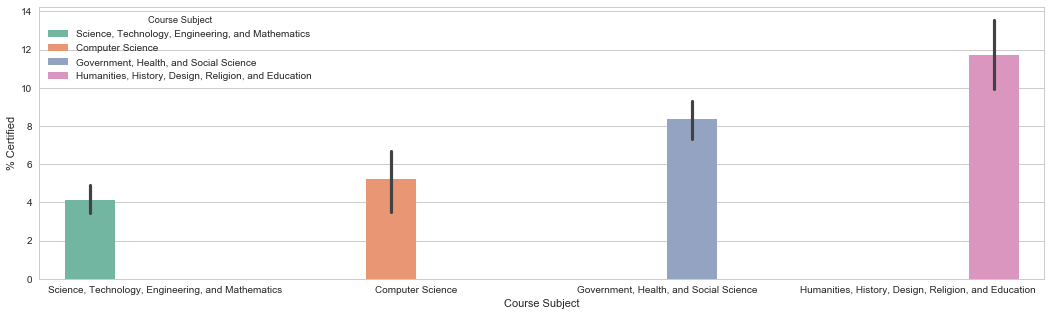

In [37]:
# Look at the highest percentage of certified
plt.figure(figsize=(18, 5))
g=sns.barplot(x='Course Subject', y='% Certified', data=df,hue='Course Subject',palette="Set2")

<h6>The result illustrate that Humanities, History, Design, Resign, Religion and Education has more certified rate when compare to other thress course subject</h6>
<pre>
<p style="font-family:Calibri Light;">
    Around 4 % higher than Government, Health and Social Science
    Around 7 % higher than Computer Science
    Around 8 % highter than Science, Technology, Engineering and Mathematics
</p>

</pre>

<h4>Then later we want to check student segmentation. Let start from gender, whether gender is a key of % certified in this subject area<h4>

In [38]:
#Make a subset dataset - HHDRE
Hudf= df[df['Course Subject']=='Humanities, History, Design, Religion, and Education']

(-1.1841541319329285,
 1.1121394031156169,
 -1.1894089344116927,
 1.108534472517767)

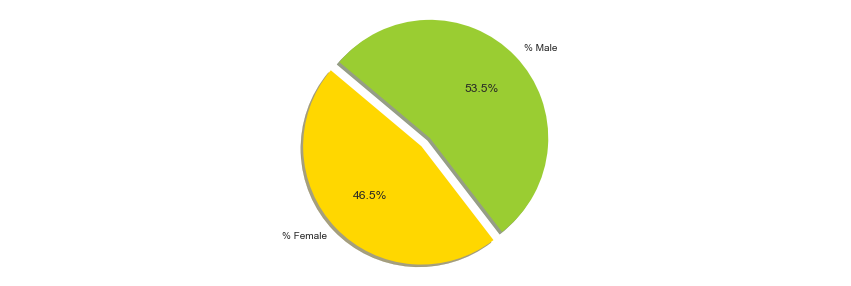

In [39]:
plt.figure(figsize=(15, 5))
Female=Hudf['% Female'].mean()
Male=Hudf['% Male'].mean()
labels = ['%Male','%Female']
values = [Male,Female]

# Data to plot
labels = '% Female', '% Male'
sizes = [Female, Male]
colors = ['gold', 'yellowgreen']
explode = (0.1, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')

<pre>
<p style="font-family:Calibri Light;">By looking at the above charts, it shows that Male has slightly higher % rate to Female in this subject area. The next step we want to see is that whether gender with different attribute contribute to the % certified ? So we will break down the original data into Male/Female with % certified  and later Male/Female with % certified and $ of Bachelor holder</p>

</pre>

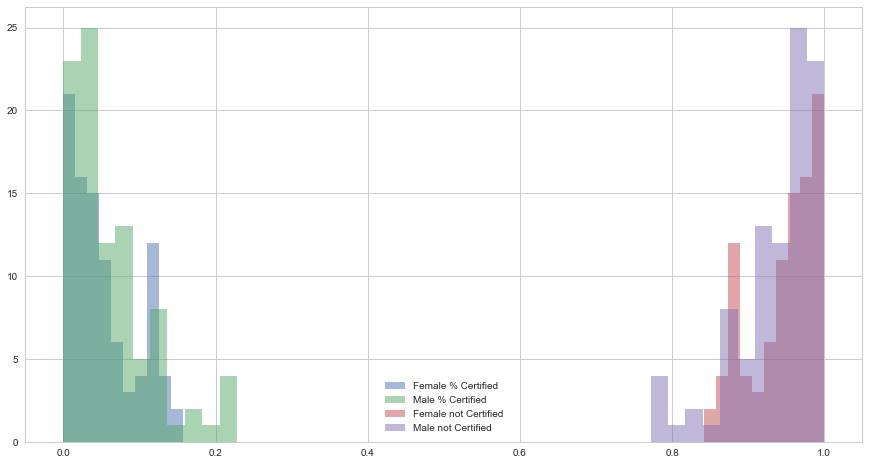

In [40]:
plt.figure(figsize=(15, 8))
plt.hist((Hudf['% Female']/100*Hudf['% Certified']/100), alpha=0.5, label='Female % Certified') 
plt.hist((Hudf['% Male']/100*Hudf['% Certified']/100), alpha=0.5, label='Male % Certified') 
plt.hist(1-(Hudf['% Female']/100* (Hudf['% Certified'])/100), alpha=0.5, label='Female not Certified') 
plt.hist(1-(Hudf['% Male']/100* (Hudf['% Certified'])/100), alpha=0.5, label='Male not Certified') 
plt.legend(loc='best')
plt.show()
plt.show()

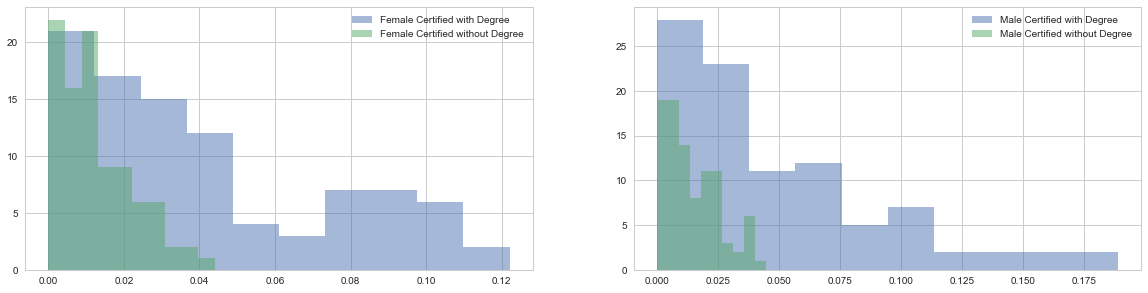

In [41]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
plt.hist((Hudf['% Female']/100*Hudf['% Certified']/100 * Hudf["% Bachelor's Degree or Higher"]/100), alpha=0.5, label='Female Certified with Degree') 
plt.hist((Hudf['% Female']/100*Hudf['% Certified']/100 * (1-(Hudf["% Bachelor's Degree or Higher"]/100))), alpha=0.5, label='Female Certified without Degree') 
plt.legend(loc='best')
plt.subplot(1, 2, 2)
plt.hist((Hudf['% Male']/100*Hudf['% Certified']/100 * Hudf["% Bachelor's Degree or Higher"]/100), alpha=0.5, label='Male Certified with Degree') 
plt.hist((Hudf['% Male']/100*Hudf['% Certified']/100 * (1-(Hudf["% Bachelor's Degree or Higher"]/100))), alpha=0.5, label='Male Certified without Degree') 
plt.gcf().subplots_adjust(bottom=0.15)

plt.legend(loc='best')
plt.show()

# Question  2 - Do popular courses have more % certified?

<pre>
<p style="font-family:Calibri Light;">
Popular course definition :  The course has a considerably students that is more than others

It comes to the common question that whether popular course has more students certified as the subject attract more enrollment
</p>
</pre>

<pre>
<p style="font-family:Calibri Light;">
The first approach in this analysis is to create a scatter chart to spot out how many student enrol in course. Then we will check the % certified.

Each point in below chart representing one course
</p>
</pre>

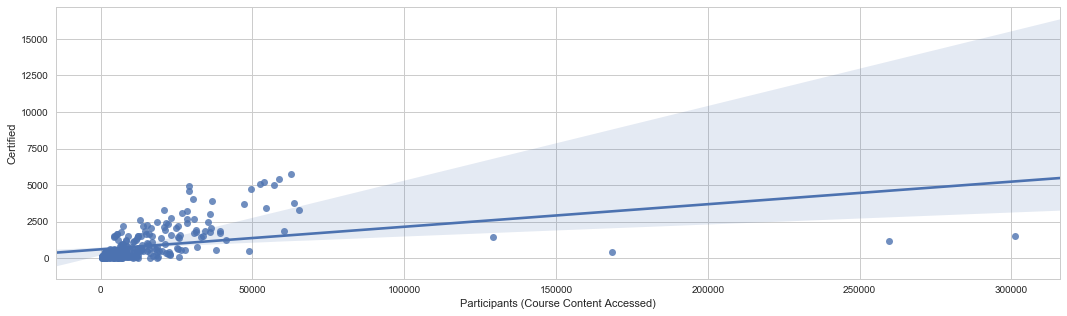

In [42]:
plt.figure(figsize=(18, 5))
ax = sns.regplot(x="Participants (Course Content Accessed)", y="Certified", data=df)

<pre>
<p style="font-family:Calibri Light;">

The above chart shows that there are four course 

We want to check what they are ......

</p>
</pre>

In [43]:
subdf= df.loc[df["Participants (Course Content Accessed)"] > 100000 ] 
subdf    

,Institution,Course Number,Launch Date,Course Title,Instructors,Course Subject,Year,Honor Code Certificates,Participants (Course Content Accessed),Audited (> 50% Course Content Accessed),...,% Certified of > 50% Course Content Accessed,% Played Video,% Posted in Forum,% Grade Higher Than Zero,Total Course Hours (Thousands),Median Hours for Certification,Median Age,% Male,% Female,% Bachelor's Degree or Higher
3,HarvardX,CS50x,2012-10-15,Introduction to Computer Science,"David Malan, Nate Hardison, Rob Bowden, Tommy ...",Computer Science,1,1,129400,12888,...,11.11,0,0.0,1.11,220.90,0.0,28.0,80.02,19.98,58.78
32,HarvardX,CS50x,2014-01-01,Introduction to Computer Science,David Malan,Computer Science,3,1,259577,22894,...,5.24,72.41,0.0,0.00,853.36,0.0,27.0,77.89,22.11,54.82
99,HarvardX,CS50x,2015-01-01,Introduction to Computer Science,David Malan,Computer Science,3,1,301082,25637,...,5.45,67.8,0.0,0.00,275.96,0.0,25.0,77.68,22.32,51.95
221,HarvardX,CS50x,2016-01-01,Introduction to Computer Science (2016),NaN,Computer Science,4,1,168335,10245,...,2.93,69.02,0.0,0.00,708.69,0.0,23.0,77.44,22.56,49.51


<pre>
<p style="font-family:Calibri Light;">

The result shows Introduction to Computer Science between 2012 to 2016..............
</p>
</pre>

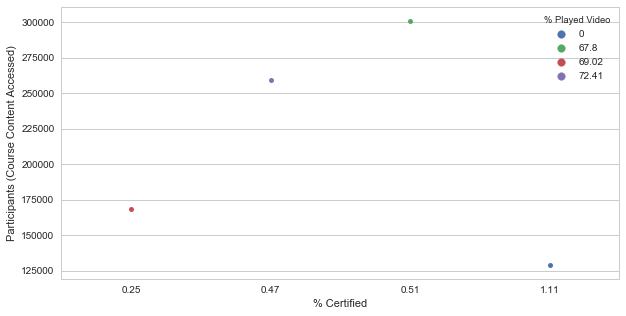

In [44]:
plt.figure(figsize=(10, 5))
adf = pd.melt(subdf, '% Certified', var_name="Participants (Course Content Accessed)")
sns.swarmplot(x='% Certified', y="Participants (Course Content Accessed)", hue='% Played Video', data=subdf)


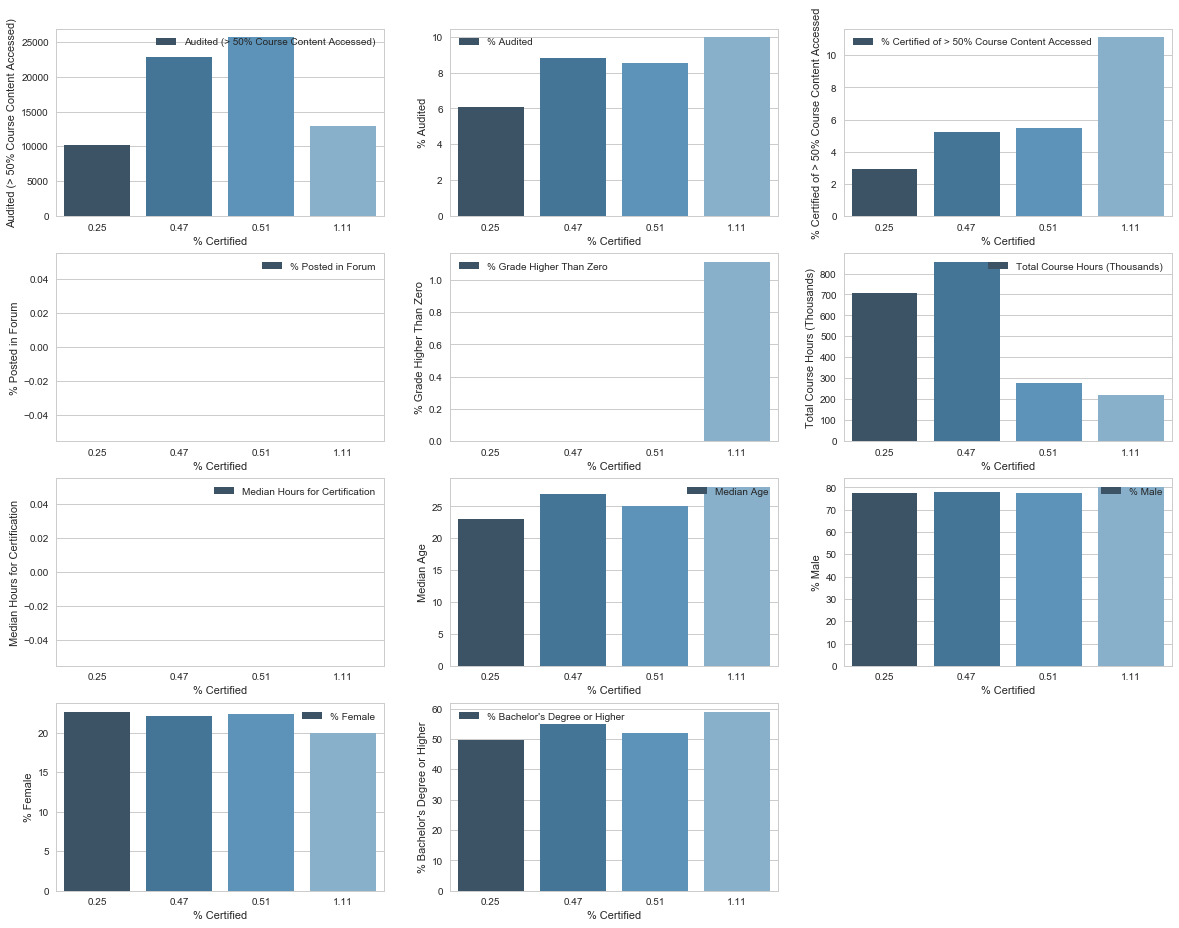

In [45]:
asubdf = subdf[["Launch Date","Audited (> 50% Course Content Accessed)",
               "Certified","% Audited","% Certified","% Certified of > 50% Course Content Accessed",
               "% Played Video","% Posted in Forum","% Grade Higher Than Zero",
               "Total Course Hours (Thousands)","Median Hours for Certification",
               "Median Age","% Male","% Female","% Bachelor's Degree or Higher"]]

plt.figure(figsize=(20, 20))
plt.subplot(5,3, 1)
sns.barplot("% Certified", y="Audited (> 50% Course Content Accessed)",palette="Blues_d",data=asubdf, label="Audited (> 50% Course Content Accessed)")
plt.legend(loc='best')
plt.subplot(5,3, 2)
sns.barplot("% Certified", y="% Audited",palette="Blues_d",data=asubdf,label="% Audited")
plt.legend(loc='best')
plt.subplot(5,3, 3)
sns.barplot("% Certified", y="% Certified of > 50% Course Content Accessed",palette="Blues_d",data=asubdf,label="% Certified of > 50% Course Content Accessed")
plt.legend(loc='best')

plt.subplot(5,3, 4)
sns.barplot("% Certified", y="% Posted in Forum",palette="Blues_d",data=asubdf,label="% Posted in Forum")
plt.legend(loc='best')
plt.subplot(5,3, 5)
sns.barplot("% Certified", y="% Grade Higher Than Zero",palette="Blues_d",data=asubdf,label="% Grade Higher Than Zero")
plt.legend(loc='best')
plt.subplot(5,3, 6)
sns.barplot("% Certified", y="Total Course Hours (Thousands)",palette="Blues_d",data=asubdf,label="Total Course Hours (Thousands)")
plt.legend(loc='best')
plt.subplot(5,3, 7)
sns.barplot("% Certified", y="Median Hours for Certification",palette="Blues_d",data=asubdf,label="Median Hours for Certification")
plt.legend(loc='best')
plt.subplot(5,3, 8)
sns.barplot("% Certified", y="Median Age",palette="Blues_d",data=asubdf,label="Median Age")
plt.legend(loc='best')
plt.subplot(5,3, 9)
sns.barplot("% Certified", y="% Male",palette="Blues_d",data=asubdf,label="% Male")
plt.legend(loc='best')
plt.subplot(5,3, 10)
sns.barplot("% Certified", y="% Female",palette="Blues_d",data=asubdf,label="% Female")
plt.legend(loc='best')
plt.subplot(5,3, 11)
sns.barplot("% Certified", y="% Bachelor's Degree or Higher",palette="Blues_d",data=asubdf,label="% Bachelor's Degree or Higher")
plt.legend(loc='best')
#TypeError: ufunc add cannot use operands with types dtype('<M8[ns]') and dtype('<M8[ns]')
#g = sns.pairplot(asubdf, hue='Certified')

In [46]:
<pre>
<p style="font-family:Calibri Light;">

The result shows ...........
</p>
</pre>

SyntaxError: invalid syntax (<ipython-input-46-832ccbcdcd2a>, line 1)

## What factors contribute to more student certifies?


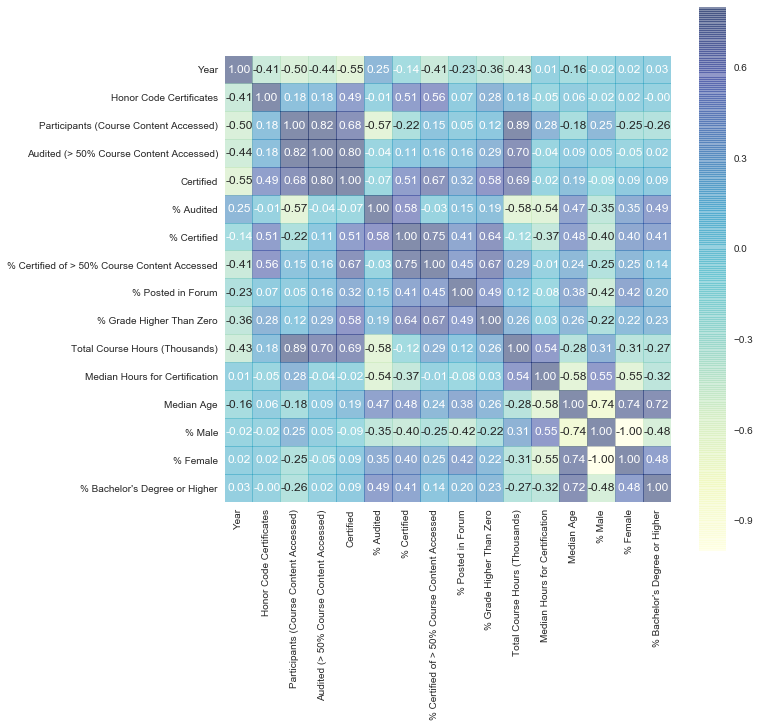

In [47]:
# heatmap
corrmat = df.corr(method='spearman') #use spearman method because all the data is ordinal
f, ax = plt.subplots(figsize=(10, 10))
# Draw the heatmap using seaborn
sns.heatmap(corrmat, cmap="YlGnBu",vmax=.8, square=True,annot=True,fmt='.2f', alpha=0.5) 
plt.show()  
  

<pre>
<p style="font-family:Calibri Light;">
The correlation of %Certified show that the most relevant to the certified are

    0.75    % Certified of >50 % course content Acccessed
    0.58    %Audited
    0.51    Honor Code certicate
    0.4     % Female

    0.64   Grade higher than 0 
    0.51   Certificate is the actual no of students
<p>
</pre>

## Conclusion